# Exploring Data Reading Techniques

In this guide, we present some examples of various methods of reading data from a file using the power of Python.

This notebook is designed to provide students with a hands-on exploration of data reading techniques, covering not only native Python approaches but also the utilization of essential modules such as ``CSV`` for basic file handling, ``NumPy`` for efficient numerical data manipulation, and ``Pandas`` for high-level, labeled data analysis. 

By the end of this tutorial, you can expect to gain a nuanced understanding of the strengths and limitations of each method, enabling you to make informed decisions when selecting the most suitable approach for reading and working with data in different scenarios.

We will work with a very simple data set that contains only two columns of data. Let's take a look at the contents of the data file:

In [1]:
! cat data/simple.csv

x, y
0, 0
1, 1
2, 4
3, 9
4, 16
5, 25
6, 36


# Reading data in native Python

We'll start by reading the data using nothing more than native Python, i.e. no third-party libraries such as ``NumPy`` or ``Pandas``.

Since we have a sequence of numbers that we want to work with as a whole, it makes sense to use lists to store the contents of each column in our data set. 

In [2]:
# Initialize two empty lists that will populate with the contents of each column in the data set
x_data, y_data = [], []

# Read the file line by line
with open("data/simple.csv", "r") as f:
    
    # Skip the first row that contains the header
    next(f)
    
    # Parse each line (str) in order to extract the x- and y-values.
    # Then, store the float representation in the corresponding list
    for line in f:
        x_data.append(float(line.strip().split(",")[0]))
        y_data.append(float(line.strip().split(",")[1]))

print("x data:", x_data)
print("y data:", y_data)

x data: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
y data: [0.0, 1.0, 4.0, 9.0, 16.0, 25.0, 36.0]


Now that we have succsesfully extracted the data from the file and stored them in some sort of data structure, we can use them for whataver analysis we want to perform.

Let's just plot the x- and y-data against each other.

In [3]:
import matplotlib.pyplot as plt

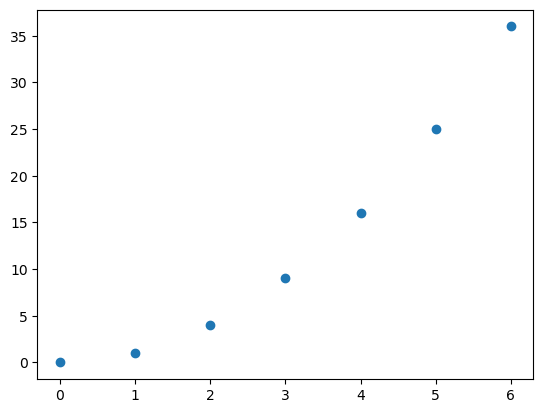

In [4]:
_ = plt.scatter(x_data, y_data)

# Reading data using the ``csv`` module

The ``csv`` module is not a third-party library; it comes with Python when you install it. However, it still needs to be explicitly imported in order to use it.

To read our data using the ``csv`` module, we follow the exact same procedure as before. The only difference is that we use a reader object provided by the ``csv`` module, which automates the string parsing we had to do manually in the example above.

In [5]:
import csv

In [6]:
x_data, y_data = [], []

with open("data/simple.csv", "r") as f:
    
    next(f)
    
    # Create a reader object that will automate the parsing for us
    reader = csv.reader(f)
    
    for data in reader:
        x_data.append(float(data[0]))
        y_data.append(float(data[1]))
        
print("x data:", x_data)
print("y data:", y_data)

x data: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
y data: [0.0, 1.0, 4.0, 9.0, 16.0, 25.0, 36.0]


We see that we ended up with the exact same results as before.

However in many cases, instead of storing our data in separate variables, we might want to store them all together in a single data structure and retrieve chunks of it when necessary. 

Let's create a new list that will contain both the x- and y-data in a 2D-like structure. Remember though that lists are, by their nature, 1D objects.

In [7]:
zipped_data = [[i,j] for i,j in zip(x_data, y_data)]

zipped_data

[[0.0, 0.0],
 [1.0, 1.0],
 [2.0, 4.0],
 [3.0, 9.0],
 [4.0, 16.0],
 [5.0, 25.0],
 [6.0, 36.0]]

In [8]:
print(type(zipped_data))

<class 'list'>


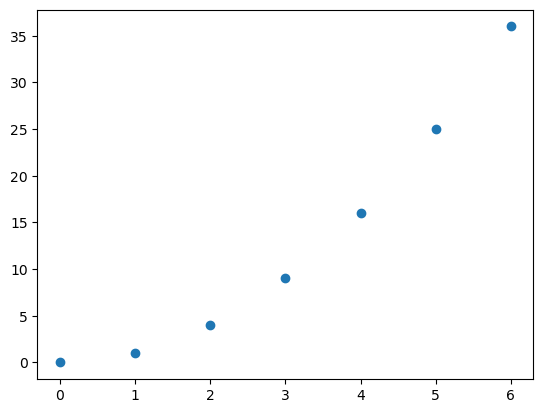

In [9]:
_ = plt.scatter(x_data, y_data)

If I didn't have the x- and y-data stored separately, and the data were available only via the zipped_data nested-lists structure, I could extract the columns using again list comprehensions:

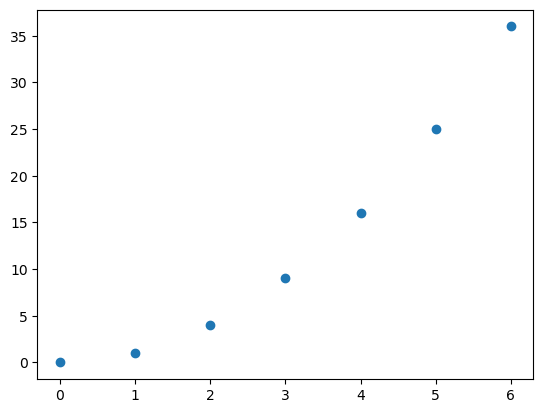

In [10]:
_ = plt.scatter(
    [zipped_data[i][0] for i in range(len(zipped_data))],
    [zipped_data[i][1] for i in range(len(zipped_data))]
)

We have seen that we can read data using basic Python. However, we had to type quite a few lines of code to do so, and for more complicated data sets, it can quickly become unmanageable. Using built-in data structures, such as lists, is also something we would like to avoid, as they do not perform well with large data sets.

To make our lives easier, we can use third-party libraries specifically designed to work with data from files. These modules offer a variety of methods to read data and automate many of the tasks we had to consider when working manually.

Moreover, these libraries are optimized to handle any volume of data and can easily outperform built-in data structures (e.g., arrays vs lists).

# Reading data with ``NumPy``

Opting to read data using the ``NumPy`` module rather than manually opening and reading the file line-by-line brings forth several advantages. 

``NumPy`` is a powerful numerical computing library in Python, specifically designed for handling large, multi-dimensional arrays and matrices. When dealing with numeric data, ``NumPy`` provides efficient storage and operations, offering a performance boost compared to manual, line-by-line reading. 

``NumPy``'s ndarray (n-dimensional array) simplifies data manipulation by supporting element-wise operations, mathematical functions, and broadcasting, thereby reducing the need for explicit loops and conditional statements. Additionally, ``NumPy`` seamlessly integrates with other scientific computing libraries, making it a foundational component for various data analysis tasks. Its optimized algorithms and array-oriented computing capabilities enhance the speed and efficiency of data processing. 

In summary, utilizing ``NumPy`` for reading data enhances code efficiency, improves computational performance, and provides a versatile foundation for numerical operations on large datasets.

In [11]:
import numpy as np

In [12]:
data = np.loadtxt("data/simple.csv", delimiter=',', skiprows=1)

In [13]:
# See the similarity with the zipped_data nested-lists structure?
print(data)
print(type(data))

[[ 0.  0.]
 [ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]
 [ 6. 36.]]
<class 'numpy.ndarray'>


We can slice the 2D array in order to store the data in separate variables:

In [14]:
xdata = data[:, 0]   # x-data are all rows of the first column (index 0)
ydata = data[:, 1]   # y-data are all rows of the second column (index 1)

In [15]:
print("x data:", xdata)
print("y data:", ydata)

x data: [0. 1. 2. 3. 4. 5. 6.]
y data: [ 0.  1.  4.  9. 16. 25. 36.]


or, directly unpack the data into two variables, by setting the ``unpack`` keyword equal to ``True``:

In [16]:
xdata, ydata = np.loadtxt("data/simple.csv", delimiter=',', skiprows=1, unpack=True)

In [17]:
print("x data:", xdata)
print("y data:", ydata)

x data: [0. 1. 2. 3. 4. 5. 6.]
y data: [ 0.  1.  4.  9. 16. 25. 36.]


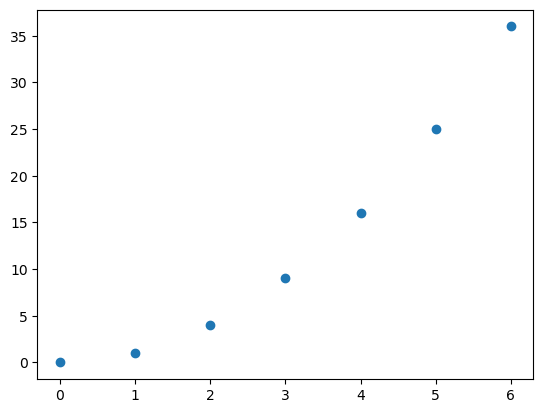

In [18]:
_ = plt.scatter(xdata, ydata)

# Reading data with ``Pandas``

Reading data using the ``Pandas`` module is often a superior approach compared to manually opening a file and reading it line-by-line for several reasons. 

``Pandas`` provides a high-level, efficient, and user-friendly interface for data manipulation and analysis. It allows for the seamless import of various file formats, such as CSV, Excel, and SQL databases, with just a single line of code, eliminating the need for intricate parsing and formatting. 

``Pandas`` also automatically handles data alignment and missing values, simplifying the data preprocessing steps. Its powerful DataFrame structure, which organizes data into rows and columns, facilitates easy indexing, filtering, and aggregation operations. 

Moreover, ``Pandas`` offers robust functionality for handling large datasets, optimizing memory usage, and supporting operations that would otherwise require complex loops or conditional statements when performed manually.

Overall, using ``Pandas`` streamlines the data reading process, enhances code readability, and significantly reduces the development time for data-related tasks.

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("data/simple.csv")
df

,x,y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36


In [21]:
df.columns   # Check the column names

Index(['x', ' y'], dtype='object')

The name of the second column contains a leading space character. This might be inconvenient when trying to work with the contents of that column. So let's rename it:

In [22]:
df.rename(columns={" y":"y"}, inplace=True)

In [23]:
df.columns

Index(['x', 'y'], dtype='object')

In [24]:
datax = df["x"]         # Get the data as a Pandas Series object
datay = df["y"].values  # Get the data as a NumPy array

In [25]:
datax

0    0
1    1
2    2
3    3
4    4
5    5
6    6
Name: x, dtype: int64

In [26]:
datay

array([ 0,  1,  4,  9, 16, 25, 36])

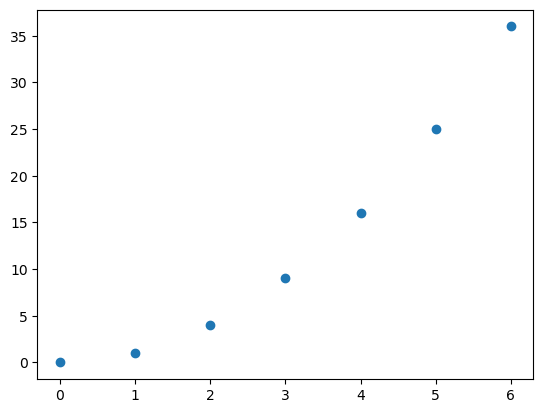

In [27]:
# Matplotlib doesn't distinguish between Series, arrays, lists, tuples, etc., 
# as long as they all have the same length, size, or shape.

# Here datax is a Series object and datay is a NumPy array
_ = plt.scatter(datax, datay)

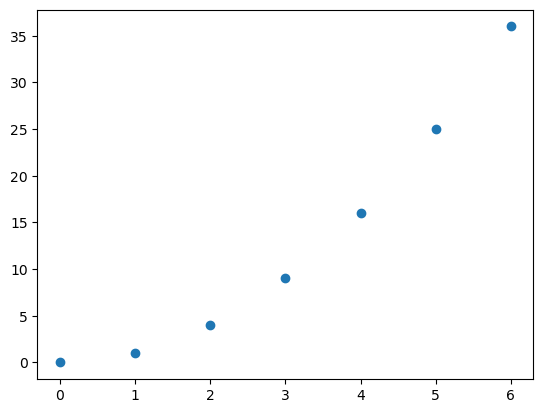

In [28]:
# or call them directly...
_ = plt.scatter(df["x"], df["y"])

# ``NumPy`` vs ``Pandas``: what to choose?

## NumPy:

### Advantages:
- **Efficiency:** NumPy is optimized for numerical operations and array manipulations, making it faster for certain types of calculations compared to Pandas.
- **Memory Efficiency:** NumPy arrays typically use less memory compared to Pandas DataFrames, making it suitable for large datasets.
- **Array Operations:** NumPy's array-oriented computing allows for convenient and efficient mathematical operations on entire arrays.

### Limitations:
- **Functionality:** NumPy primarily deals with numerical arrays, and its functionality is more focused on numerical operations. It lacks some of the higher-level data manipulation features provided by Pandas.
- **Data Structures:** While NumPy provides arrays, it doesn't offer labeled data structures like Pandas DataFrames, which can be limiting for certain types of data analysis tasks.

## Pandas:

### Advantages:
- **DataFrames:** Pandas introduces the DataFrame, a two-dimensional labeled data structure that is highly versatile for data manipulation and analysis.
- **Data Alignment:** Pandas handles data alignment automatically, making it easier to work with datasets of different shapes and handle missing data.
- **Rich Functionality:** Pandas offers extensive data manipulation tools, including grouping, merging, reshaping, and time-series functionality.

### Limitations:
- **Performance:** Pandas may be slower than NumPy for certain numerical operations, especially on large datasets.
- **Memory Usage:** Pandas DataFrames can consume more memory compared to NumPy arrays, which might be a consideration for very large datasets.

## Choosing Between NumPy and Pandas:

- If your primary focus is on numerical operations and you're working with large datasets where memory efficiency is crucial, NumPy might be a better choice.
- If your tasks involve complex data manipulation, analysis, and exploration, especially with labeled data, Pandas provides a more convenient and feature-rich environment.

In practice, many data scientists and analysts use both libraries in conjunction, leveraging the strengths of each depending on the specific task at hand.
